# Hotel Reservation Booking Status Prediction using DecisionTree, RandomForest, AdaBoost,XGBoost
## In this project i will do 
### 1.Import Libraries
### 2.Feature engineering(label encoder, check and remove outlier, resample the data)
### 3.data correlation using heatmap
### 4.Train-Test split
### 5.Model Selection
### 6.Tuning & Cross validation
### 7.Evaluate with metrics(accuracy,confusion_matrix,classification_report)
### 8.ROC-AUC Curve
### 9.Feature importance
### 10.Finalise the model

# Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Exploratory Data Analysis

<Axes: xlabel='booking_status', ylabel='count'>

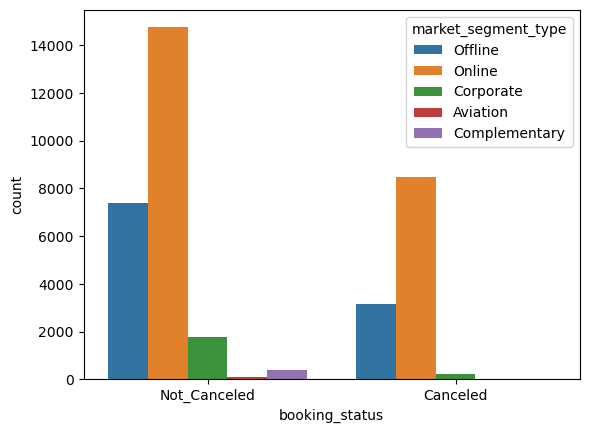

In [5]:
sns.countplot(data=df, x='booking_status', hue='market_segment_type')

<Axes: xlabel='booking_status', ylabel='count'>

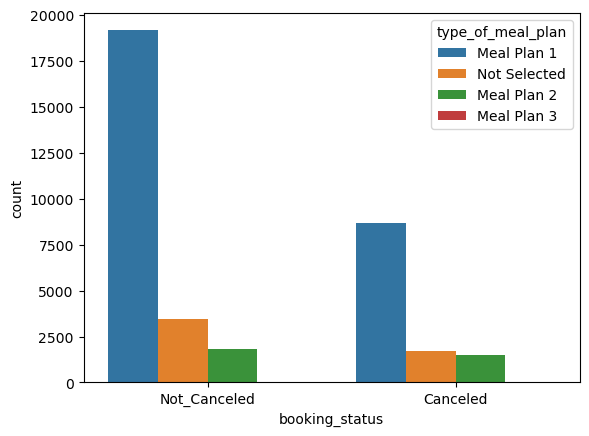

In [6]:
sns.countplot(data=df, x='booking_status', hue='type_of_meal_plan')

<Axes: xlabel='booking_status', ylabel='count'>

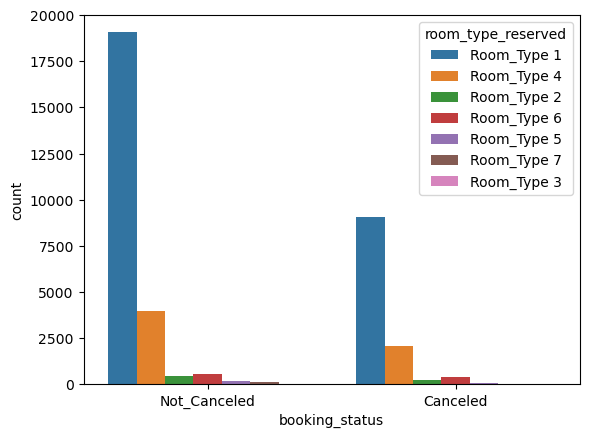

In [7]:
sns.countplot(data=df, x='booking_status', hue='room_type_reserved')

<Axes: xlabel='booking_status', ylabel='count'>

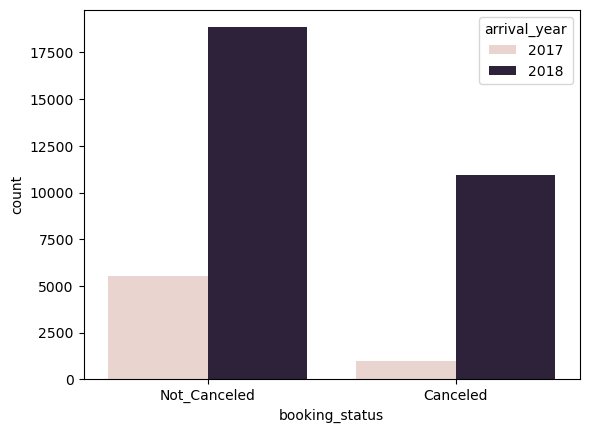

In [8]:
sns.countplot(data=df, x='booking_status', hue='arrival_year')

<Axes: xlabel='booking_status', ylabel='count'>

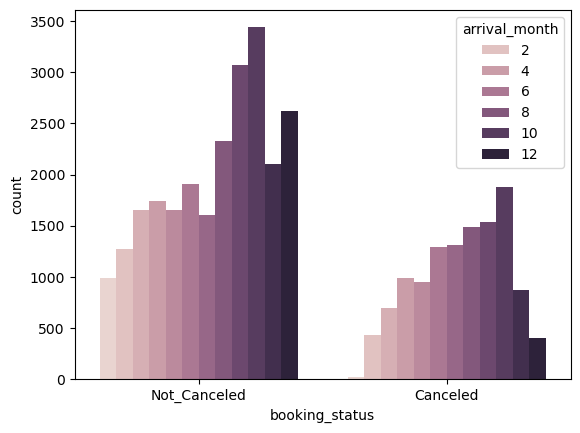

In [9]:
sns.countplot(data=df, x='booking_status', hue='arrival_month')

<Axes: xlabel='booking_status', ylabel='avg_price_per_room'>

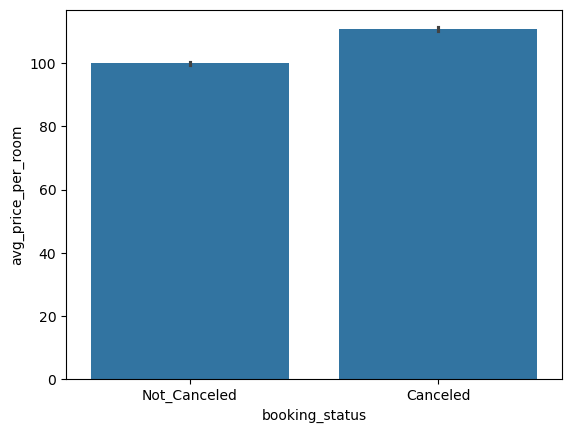

In [10]:
sns.barplot(data=df, x='booking_status', y='avg_price_per_room')

<Axes: xlabel='booking_status', ylabel='lead_time'>

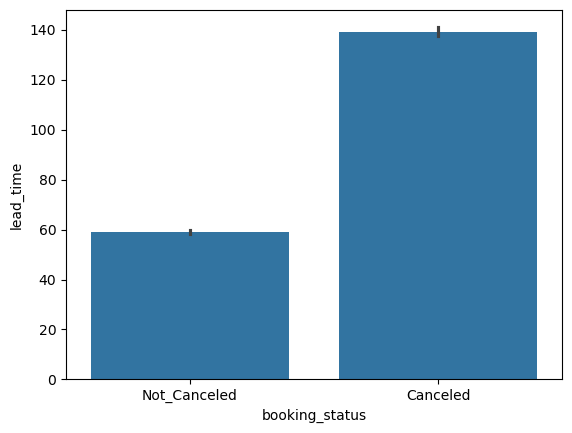

In [11]:
sns.barplot(data=df, x='booking_status', y='lead_time')

# Data Preprocessing

In [12]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [14]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [15]:
df.shape

(36275, 19)

In [16]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [17]:
df.drop(columns='Booking_ID', inplace=True)
df.shape

(36275, 18)

In [18]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [19]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [20]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [21]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

# Label Encoder

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type_of_meal_plan'] = le.fit_transform(df['type_of_meal_plan'])
df['type_of_meal_plan'].unique()

array([0, 3, 1, 2])

In [23]:
df['room_type_reserved']= le.fit_transform(df['room_type_reserved'])
df['room_type_reserved'].unique()

array([0, 3, 1, 5, 4, 6, 2])

In [24]:
df['market_segment_type']= le.fit_transform(df['market_segment_type'])
df['market_segment_type'].unique()

array([3, 4, 2, 0, 1])

In [25]:
df['booking_status']= le.fit_transform(df['booking_status'])
df['booking_status'].unique()

array([1, 0])

In [26]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int32
required_car_parking_space                int64
room_type_reserved                        int32
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int32
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int32
dtype: object

In [27]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


# Check the Outlier

<Axes: xlabel='lead_time'>

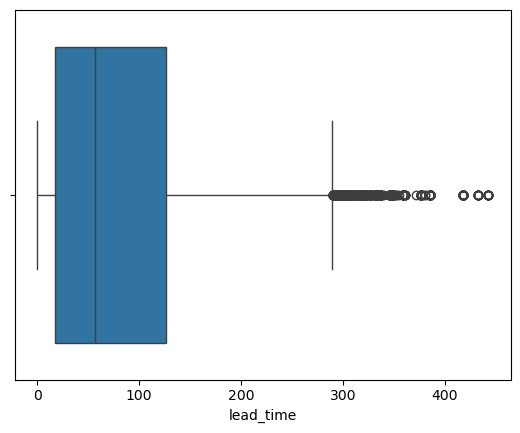

In [28]:
sns.boxplot(x=df['lead_time'])

<Axes: xlabel='avg_price_per_room'>

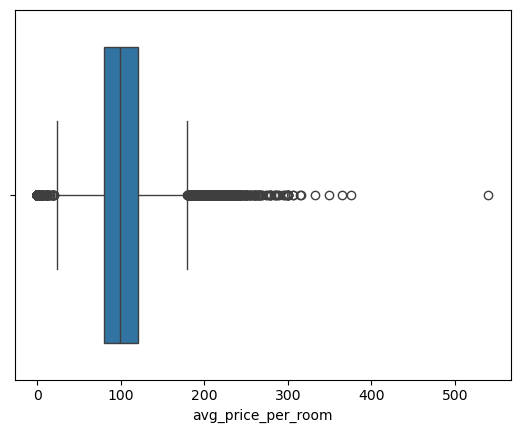

In [29]:
sns.boxplot(x=df['avg_price_per_room'])

# remove the outlier using Z-score

In [30]:


import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis=1)]
data_clean.shape

(31386, 18)

In [31]:
df.shape

(36275, 18)

# data correlation using heatmap

<Axes: >

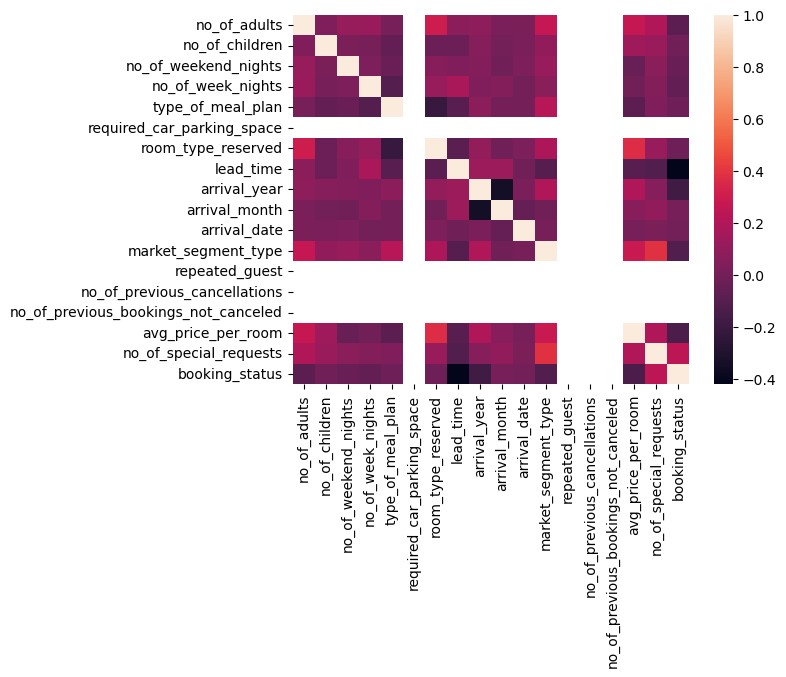

In [32]:
sns.heatmap(data_clean.corr(), fmt='.2g')

# correlation between class and other attributes

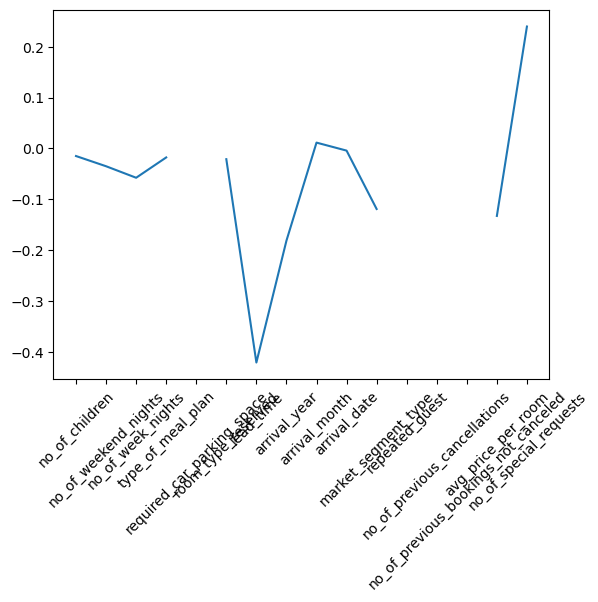

In [33]:
corr = data_clean[data_clean.columns[1:]].corr()['booking_status'][:-1]
plt.plot(corr)
plt.xticks(rotation=45)
plt.show()

In [34]:
#Remove unnecesary attribute
cols_to_drop = [
    'required_car_parking_space',
    'repeated_guest',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled'
]
data_clean.drop(columns=cols_to_drop,inplace=True)
data_clean.head()

C:\Users\Shehan\AppData\Local\Temp\ipykernel_41312\468493940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(columns=cols_to_drop,inplace=True)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,224,2017,10,2,3,65.00,0,1
1,2,0,2,3,3,0,5,2018,11,6,4,106.68,1,1
2,1,0,2,1,0,0,1,2018,2,28,4,60.00,0,0
3,2,0,0,2,0,0,211,2018,5,20,4,100.00,0,0
4,2,0,1,1,3,0,48,2018,4,11,4,94.50,0,0


# To check Class balance or not

booking_status
1    20760
0    10626
Name: count, dtype: int64

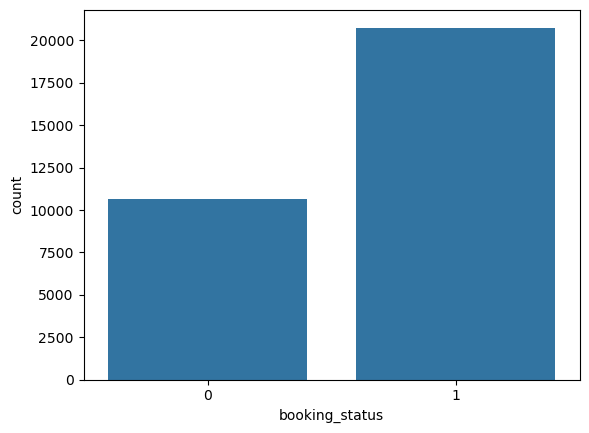

In [35]:

sns.countplot(data=data_clean, x='booking_status')
data_clean['booking_status'].value_counts()

# resample the data

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd

In [37]:
# split first
X = data_clean.drop('booking_status', axis=1)
y = data_clean['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# combine X_train and y_train for resampling
train_df = pd.concat([X_train, y_train], axis=1)

# seperate majority and minority classes
df_majority = train_df[train_df['booking_status'] == 1]
df_minority = train_df[train_df['booking_status'] == 0]

# upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# combine majority and minority classes
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

# shuffle
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# split back into X and y 
X_train_resampled = df_upsampled.drop('booking_status', axis=1)
y_train_resampled = df_upsampled['booking_status']

# Machine Learning Model Building

# 1. Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [39]:
y_pred = dtree.predict(X_test)

# Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],         # criterion: Measures the quality of a split.
    'max_depth': [None, 5, 10, 20],           # max_depth: Maximum depth of the tree (how many levels)
    'min_samples_split': [2, 5, 10],          # min_sample_spit: Minimum samples required to split a node.
    'min_samples_leaf': [1, 2, 4],            # min_sample_leaf: Minimum samples required in each leaf node.
    'max_features': [None, 'sqrt', 'log2']    # Number of features to consider when looking for the best split.
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9213888164773565


In [41]:
# use best model
best_dtree = grid_search.best_estimator_

## Cross Validation with Best Model

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dtree, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print('Cross-Validation Scores:',cv_scores)
print('Mean CV Accuracy:', cv_scores.mean())

Cross-Validation Scores: [0.91961463 0.92172211 0.91223845 0.9238296  0.9295393 ]
Mean CV Accuracy: 0.9213888164773565


## Evaluation check

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2), '%')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classificatin Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 86.86 %
Confusion Matrix:
 [[1693  432]
 [ 393 3760]]
Classificatin Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      2125
           1       0.90      0.91      0.90      4153

    accuracy                           0.87      6278
   macro avg       0.85      0.85      0.85      6278
weighted avg       0.87      0.87      0.87      6278



## ROC and AUC Curve

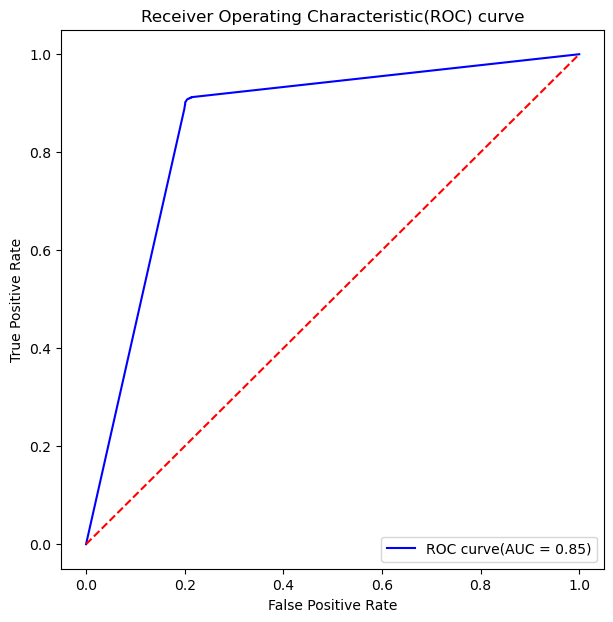

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predicted probabilities for positive class
y_pred_proba = dtree.predict_proba(X_test)[:,1]

# compute fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate Area Under the Curve(AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# plot the Receiver Operating Characteristic (ROC)
plt.figure(figsize= (7,7))
plt.plot(fpr,tpr, color='blue', label='ROC curve(AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', linestyle='--')

# diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance

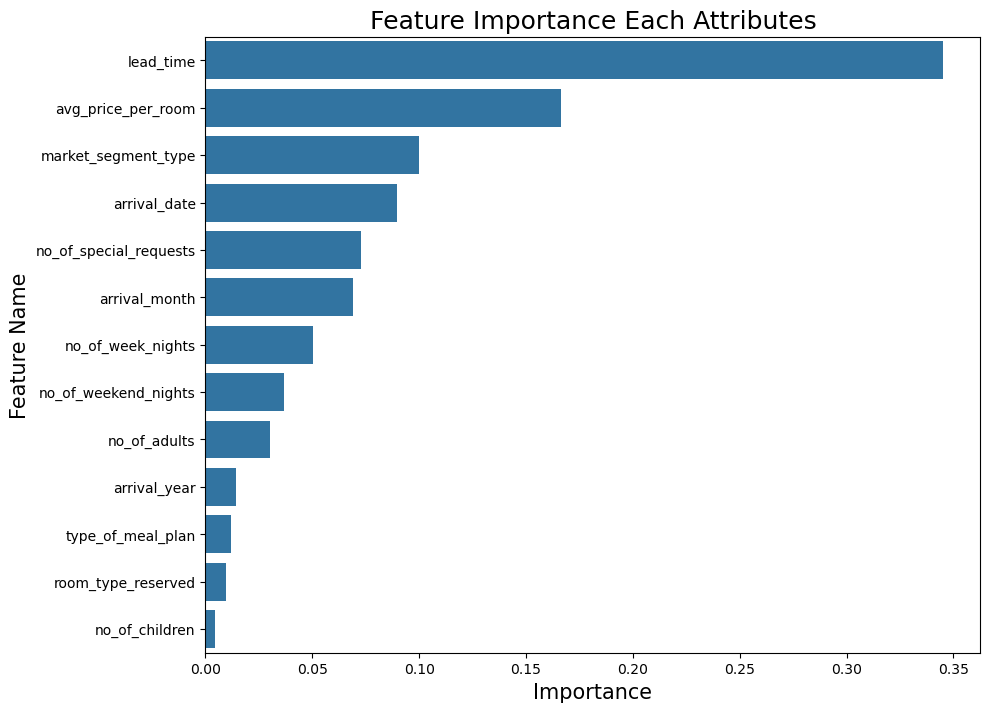

In [45]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=15)
plt.ylabel ('Feature Name', fontsize=15)
plt.show()

# 2. Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [47]:
y_pred = rfc.predict(X_test)

# Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees
    'max_depth': [None, 10, 20],        # Depth of tree
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples in a leaf
    'max_features': ['sqrt', 'log2']    # Number of features to consider for best split
}

# GridSearchCV
grid_search_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_grid=param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1)

# Fit
grid_search_rfc.fit(X_train_resampled, y_train_resampled)

print("Best Parameters for Random Forest:", grid_search_rfc.best_params_)
print("Best CV Score:", grid_search_rfc.best_score_)


Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.9434577030300384


In [49]:
# use best model
best_rfc = grid_search_rfc.best_estimator_

# Cross Validation with Best Model

In [50]:
from sklearn.model_selection import cross_val_score

cv_scores_rfc = cross_val_score(best_rfc, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores_rfc)
print("Mean CV Accuracy:", cv_scores_rfc.mean())


Cross-validation scores: [0.93963571 0.94370014 0.94053891 0.94580762 0.94760614]
Mean CV Accuracy: 0.9434577030300384


## Evaluation check

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2), '%')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classificatin Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 89.81 %
Confusion Matrix:
 [[1746  379]
 [ 261 3892]]
Classificatin Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      2125
           1       0.91      0.94      0.92      4153

    accuracy                           0.90      6278
   macro avg       0.89      0.88      0.88      6278
weighted avg       0.90      0.90      0.90      6278



## ROC and AUC curve

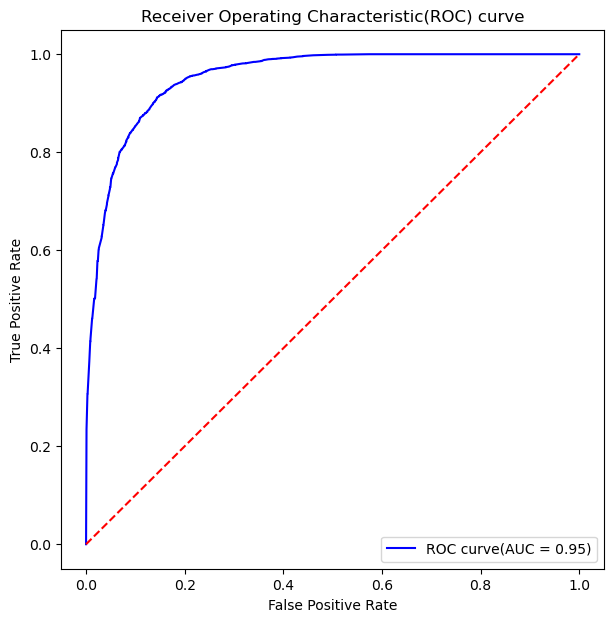

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predicted probabilities for positive class
y_pred_proba = rfc.predict_proba(X_test)[:,1]

# compute fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate Area Under the Curve(AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# plot the Receiver Operating Characteristic (ROC)
plt.figure(figsize= (7,7))
plt.plot(fpr,tpr, color='blue', label='ROC curve(AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', linestyle='--')

# diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show()

## Feature Importance

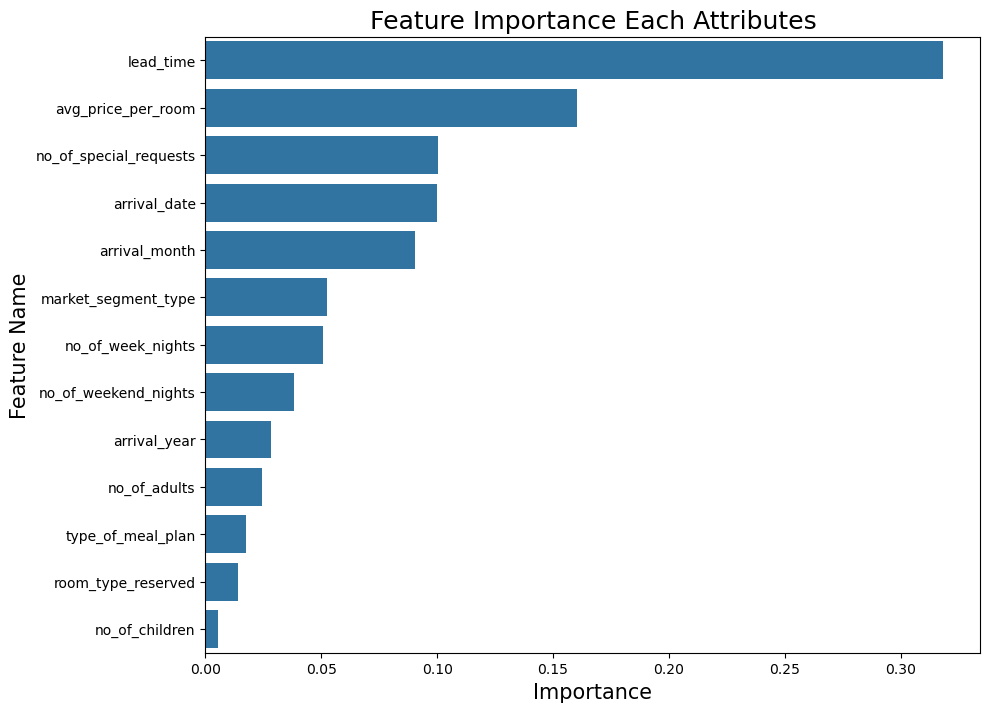

In [54]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=15)
plt.ylabel ('Feature Name', fontsize=15)
plt.show()

# 3. AdaBoost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train_resampled, y_train_resampled)

C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [56]:
y_pred = ada.predict(X_test)

# Hyperparameter Tuning

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],                    # n_estimators → Number of weak learners (trees).
    'learning_rate': [0.01, 0.1, 1],                   # learning_rate → Shrinks the contribution of each classifier (default=1.0).
    'estimator__max_depth': [1, 2, 3]                  # Changed from base_estimator__max_depth to estimator__max_depth
}

# AdaBoost with DecisionTree as base estimator
# Explicitly set the base estimator
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),  # Explicitly define the base estimator
    random_state=42
)

# GridSearchCV
grid_search_ada = GridSearchCV(estimator=ada,
                                param_grid=param_grid_ada,
                                cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search_ada.fit(X_train_resampled, y_train_resampled)

print("Best Parameters for AdaBoost:", grid_search_ada.best_params_)
print("Best CV Accuracy:", grid_search_ada.best_score_)

C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters for AdaBoost: {'estimator__max_depth': 3, 'learning_rate': 1, 'n_estimators': 200}
Best CV Accuracy: 0.8774311815073592


In [58]:
# use best model
best_ada = grid_search_ada.best_estimator_

# Cross Validation with Best Model

In [59]:
from sklearn.model_selection import cross_val_score

cv_scores_ada = cross_val_score(best_ada, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores_ada)
print("Mean CV Accuracy:", cv_scores_ada.mean())


C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

Cross-validation scores: [0.88318531 0.87400271 0.87716393 0.87611019 0.87669377]
Mean CV Accuracy: 0.8774311815073592


## Evaluation check

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2), '%')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classificatin Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 79.24 %
Confusion Matrix:
 [[1674  451]
 [ 852 3301]]
Classificatin Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72      2125
           1       0.88      0.79      0.84      4153

    accuracy                           0.79      6278
   macro avg       0.77      0.79      0.78      6278
weighted avg       0.81      0.79      0.80      6278



## ROC and AUC curve

C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


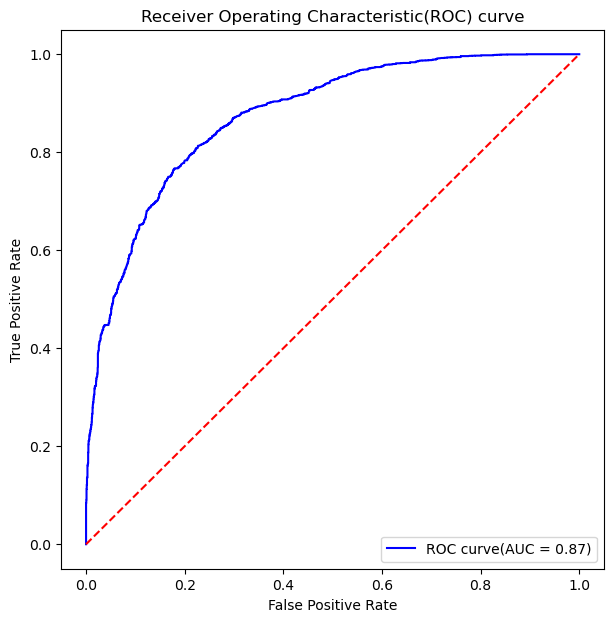

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

ada= AdaBoostClassifier()
ada.fit(X_train_resampled, y_train_resampled)

# predicted probabilities for positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# compute fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate Area Under the Curve(AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# plot the Receiver Operating Characteristic (ROC)
plt.figure(figsize= (7,7))
plt.plot(fpr,tpr, color='blue', label='ROC curve(AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', linestyle='--')

# diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show()

## Feature Importance

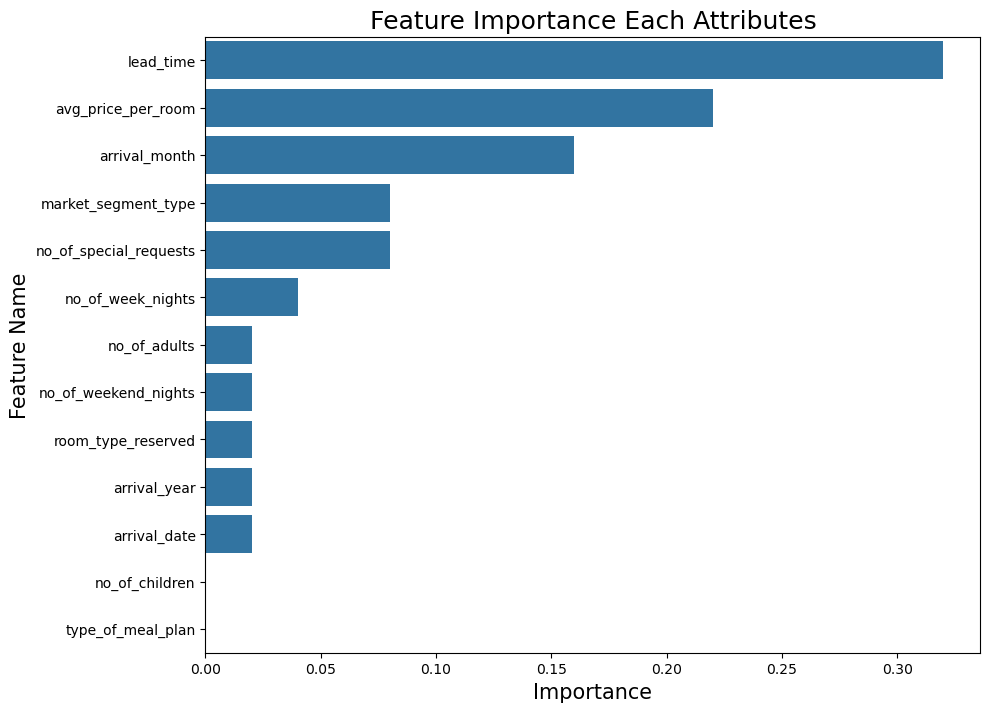

In [74]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=15)
plt.ylabel ('Feature Name', fontsize=15)
plt.show()

# 4. XGBoost Classifier

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [64]:
y_pred = xgb.predict(X_test)

# Hyperparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],      # n_estimators: Number of trees
    'max_depth': [3, 5, 7],          # max_depth: Maximum depth of a tree
    'learning_rate': [0.01, 0.1],    # learning_rate: Step size shrinkage
    'subsample': [0.8, 1.0],         # subsample: Fraction of samples used per tree
    'colsample_bytree': [0.8, 1.0],  # colsample_bytree: Fraction of features used per tree
    'gamma': [0, 0.1]                # gamma: Minimum loss reduction for a split.
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model,
                                param_grid=param_grid_xgb,
                                cv=5, scoring='accuracy', n_jobs=-1)

# Fit
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best CV Score:", grid_search_xgb.best_score_)


C:\Users\Shehan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best CV Score: 0.9071174983748767


In [66]:
# use best model
best_xgb = grid_search_xgb.best_estimator_

# Cross Validation with Best Model

In [67]:
from sklearn.model_selection import cross_val_score

cv_scores_xgb = cross_val_score(best_xgb, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores_xgb)
print("Mean CV Accuracy:", cv_scores_xgb.mean())


C:\Users\Shehan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Shehan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Shehan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:26:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Shehan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:26:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Cross-validation scores: [0.90335692 0.90892669 0.90456119 0.91013096 0.90635351]
Mean CV Accuracy: 0.9066658543883179


## Evaluation check

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2), '%')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classificatin Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 88.56 %
Confusion Matrix:
 [[1796  329]
 [ 389 3764]]
Classificatin Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      2125
           1       0.92      0.91      0.91      4153

    accuracy                           0.89      6278
   macro avg       0.87      0.88      0.87      6278
weighted avg       0.89      0.89      0.89      6278



## ROC and AUC curve

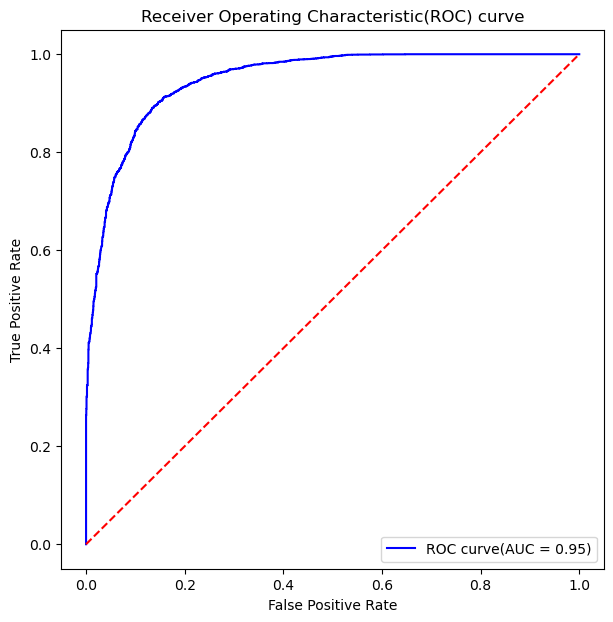

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predicted probabilities for positive class
y_pred_proba = xgb.predict_proba(X_test)[:,1]

# compute fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate Area Under the Curve(AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# plot the Receiver Operating Characteristic (ROC)
plt.figure(figsize= (7,7))
plt.plot(fpr,tpr, color='blue', label='ROC curve(AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', linestyle='--')

# diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show()

## Feature importance

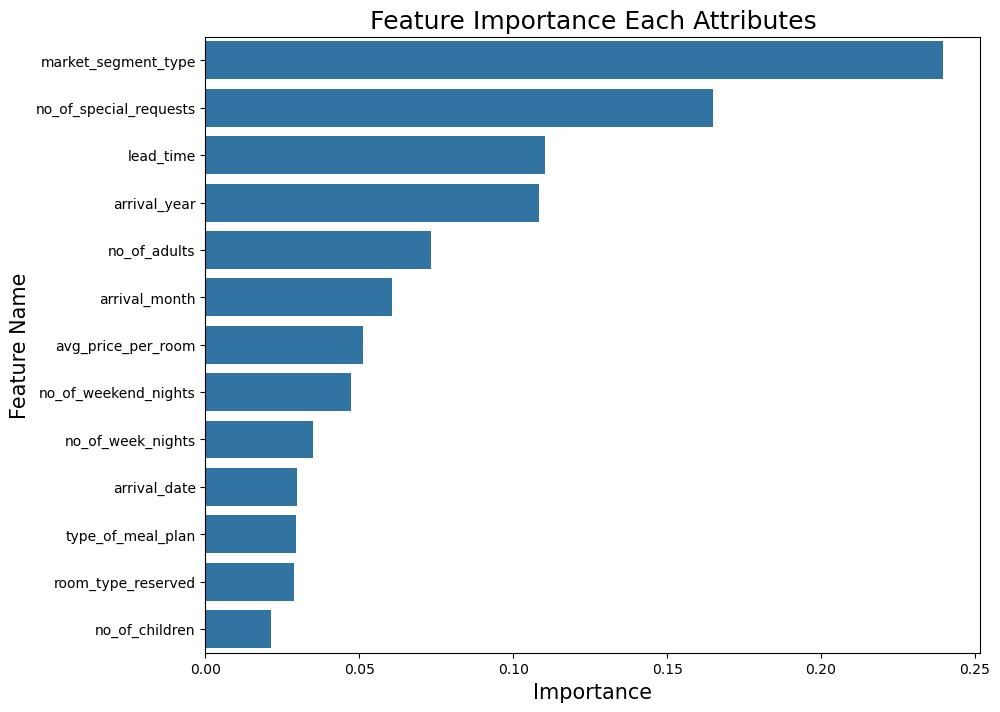

In [70]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": xgb.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=15)
plt.ylabel ('Feature Name', fontsize=15)
plt.show()

# Comparison table

In [83]:
import pandas as pd

results = {'Model': ['Decision Tree','Random Forest','AdaBoost','XGBoost'], 
          'Test Accuracy': [86.86, 89.81, 79.24, 88.56],
          'CV Accuracy': [0.921,0.943,0.877,0.906],
          'ROC-AUC':[0.85,0.95,0.87,0.95]}

comparison_df = pd.DataFrame(results)
print(comparison_df)

           Model  Test Accuracy  CV Accuracy  ROC-AUC
0  Decision Tree          86.86        0.921     0.85
1  Random Forest          89.81        0.943     0.95
2       AdaBoost          79.24        0.877     0.87
3        XGBoost          88.56        0.906     0.95


# Visualization for better impact

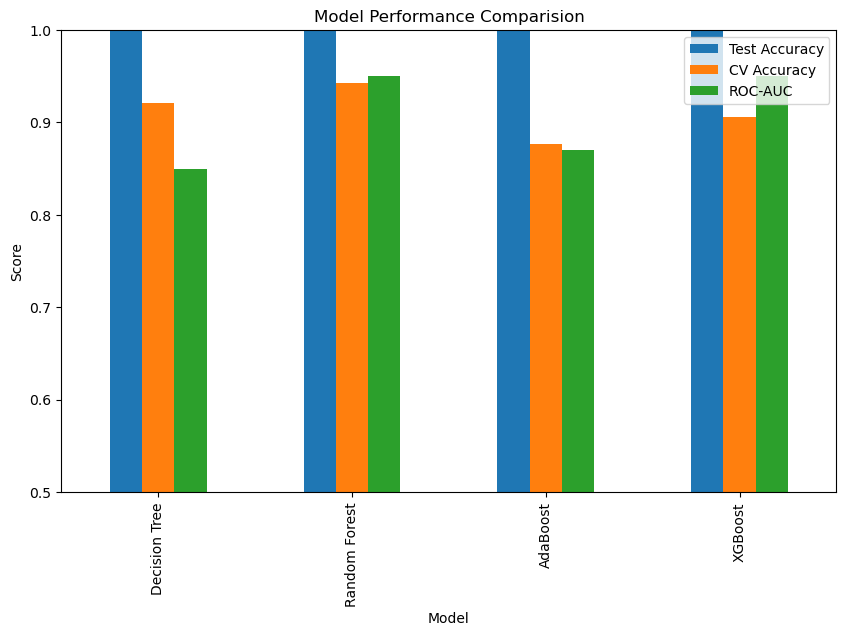

In [88]:
import matplotlib.pyplot as plt

comparison_df.plot(x='Model',y=['Test Accuracy','CV Accuracy', 'ROC-AUC'], kind='bar',figsize=(10,6))
plt.title('Model Performance Comparision')
plt.ylabel('Score')
plt.ylim(0.5,1)
plt.show()

# conclusion

## highest test accuracy = 89.81% Random Forest model
## highest CV acuracy (0.943) Random Forest model
## ROC-AUC also high(0.95) Random Forest model
## so Random Forest best model